Full notebook, mostly self-sufficient (only import an mp4 exporter from utils.py

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import numpy as np
from operator import itemgetter
import pandas as pd
import cmath
# only to export animation as mp4
from utils import export_animation_to_mp4, FourrierCurve, polygon, Cursor, SIZE

In [2]:
%matplotlib notebook

## Fourrier curve
given a list of (complex coefficient - relative frequency) terms, compute its trajectory in the complex plan


Create FourrierCurve from coefficient specification

In [3]:
myFourrier = FourrierCurve([0, 1, -1, 3], [complex(0,0), complex(1,0), complex(0.5,0.5), complex(1,0)])
myFourrier2 = FourrierCurve([0, 1, -1, 3, -3], [complex(1,0), complex(1,0), complex(0.5,0.5), complex(1,0), complex(0.2, 0.2)])

plot the curve

<IPython.core.display.Javascript object>


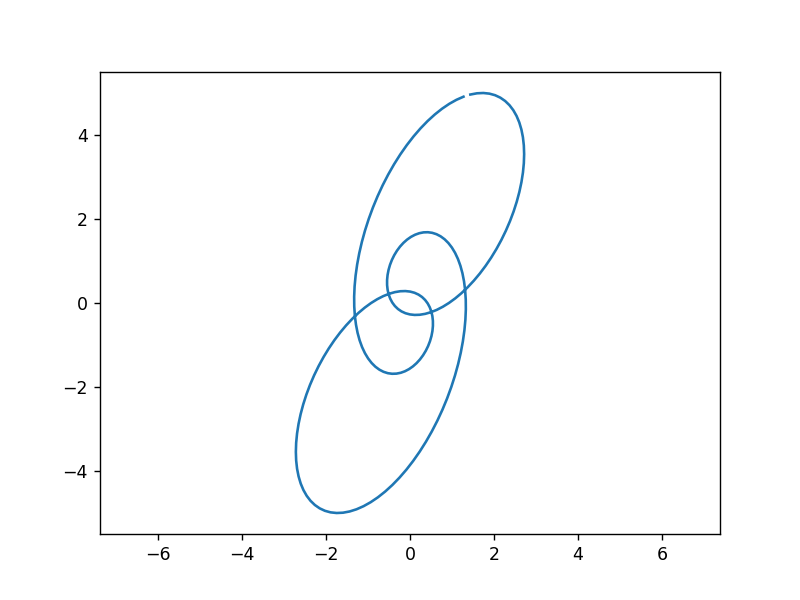

In [4]:
myFourrier2.normalize_coefs()
myFourrier2.draw()

plot with animating

<IPython.core.display.Javascript object>


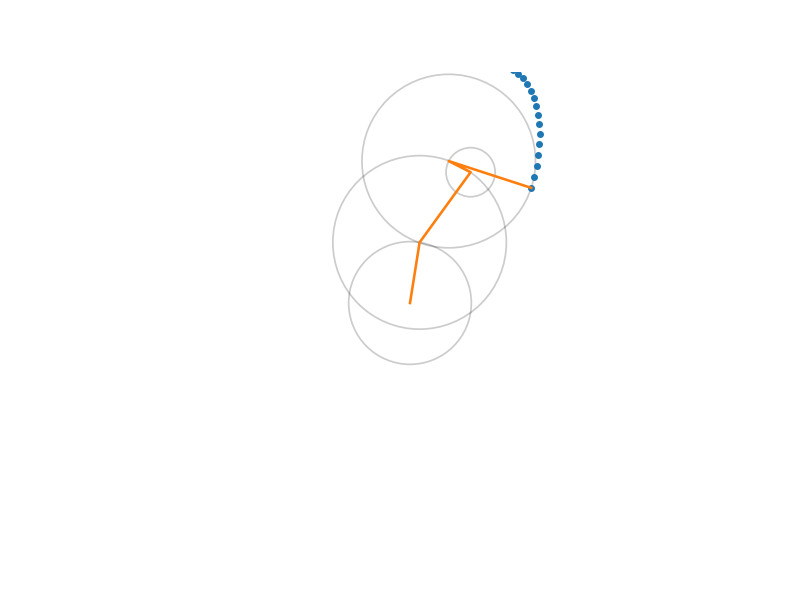

In [5]:
a = myFourrier2.animate()

export in a GIF

In [6]:
# export_animation_to_mp4(myFourrier2.animate(), 'test2')

## Reverse
Approximate a (closed) line by our fourrier curve object

arbitrary closed line

In [7]:
x = np.cos([t for t in np.arange(0, 2*np.pi, 0.01)]) + 0.5*np.cos([3*t for t in np.arange(0, 2*np.pi, 0.01)])
y = np.sin([t for t in np.arange(0, 2*np.pi, 0.01)])+ 1.5*np.sin([-3*t for t in np.arange(0, 2*np.pi, 0.01)])
a = pd.DataFrame(index = np.arange(0, 2*np.pi, 0.01))
a['x'] = x
a['y'] = y

myPolygon = polygon(a)

show the polygon

<IPython.core.display.Javascript object>


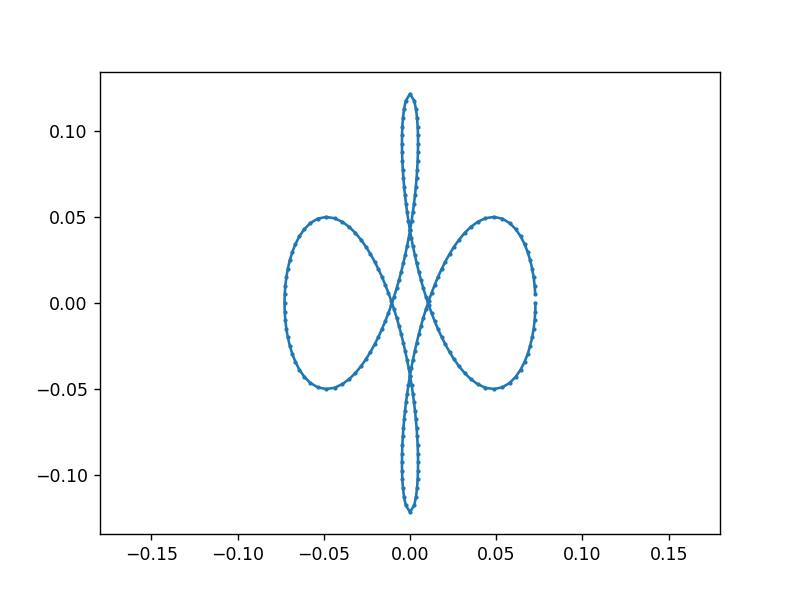

In [8]:
myPolygon.draw()

find its fourrier approcimation and animate it

<IPython.core.display.Javascript object>


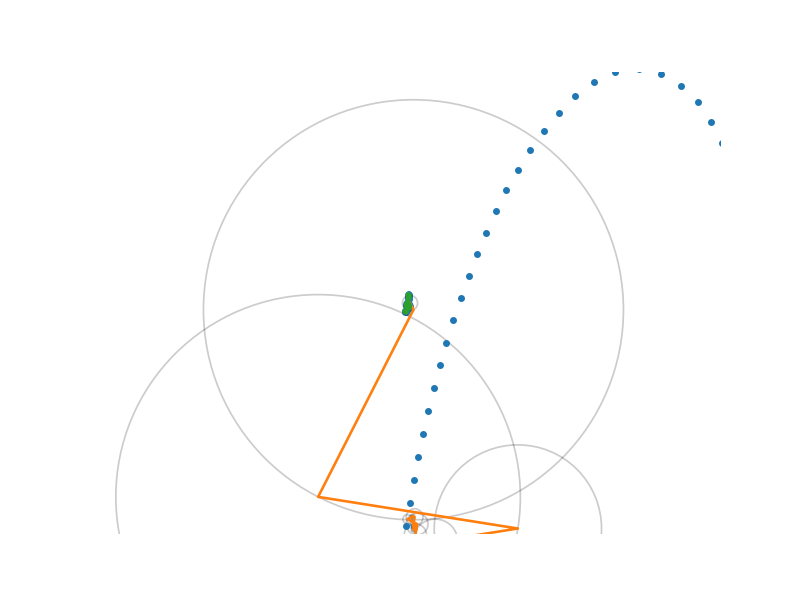

In [9]:
reproduction = myPolygon.convert_to_fourrier()
reproduction.animate()

## Custom drawing
an utility to draw our own line
* click to start drawing
* move your mouse to draw (carefull it is laggy)
* click to end the drawing

<IPython.core.display.Javascript object>


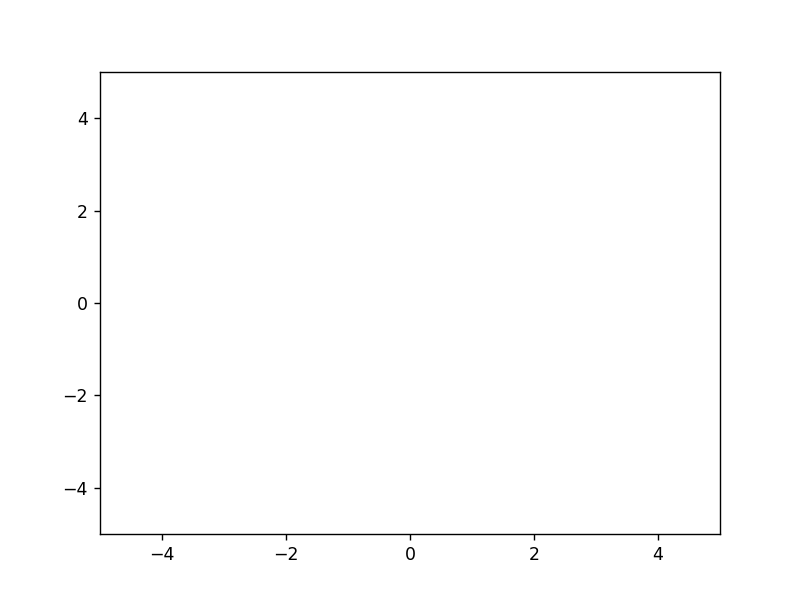

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(-SIZE, SIZE)
ax.set_ylim(-SIZE, SIZE)
cursor = Cursor(ax)
fig.canvas.mpl_connect('button_press_event', cursor.mouse_click)
fig.canvas.mpl_connect('motion_notify_event', cursor.mouse_move)

plt.show()

export drawing 

In [11]:
# polygon_data = cursor.export_drawing('sol_key')

chose one of the options :

* if you cant draw yourself, import a drawing i did :)

In [12]:
myPolygonFromDrawing = polygon('sol_key')

* if you want to use your drawing

In [13]:
#polygon_data = cursor.export_drawing()
#myPolygonFromDrawing = polygon(polygon_data)

resume here

plot the Fourrier serie approximating your drawing

In [14]:
myPolygonFromDrawing.draw()

animate it

<IPython.core.display.Javascript object>


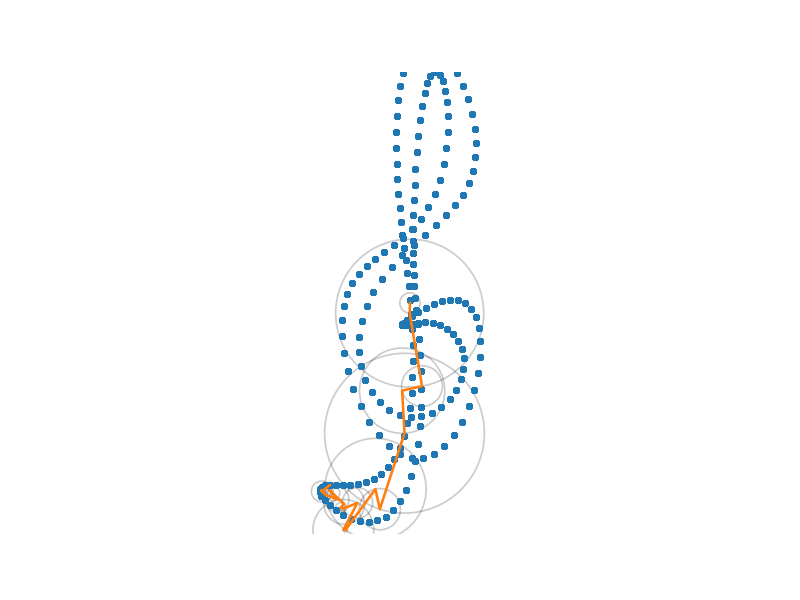

In [15]:
reproduction = myPolygonFromDrawing.convert_to_fourrier(10)
reproduction.animate()

export video

In [ ]:
# export_animation_to_mp4(reproduction.animate(), 'sol_key')